# MCT4052 Workshop 5d: MIDI Files + LDA + SVM Classifier v1

*Author: Stefano Fasciani, stefano.fasciani@imv.uio.no, Department of Musicology, University of Oslo.*

The notebooks Workshop 5b to 5h integrates a stage of dimensionality reduction with different type of machine learning technique (classification, regression, clustering) on audio or MIDI data. The machine learning techniques included in this set of examples are those from previous workshops.

In [1]:
import numpy as np
import pandas as pd
import scipy
import librosa, librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
import IPython.display as Ipd
import os
import sklearn
import pretty_midi

%matplotlib inline
%config IPCompleter.greedy=True

In [2]:

def extract_features(filename):
    
    pm = pretty_midi.PrettyMIDI(filename)
    
    output = np.mean(pm.get_chroma(), axis=1).flatten()
   
    output = np.append(output, np.var(pm.get_chroma(), axis=1).flatten())
    
    return output


filenames = os.listdir('./data/examples8')
num_of_features = len(extract_features('./data/examples8/'+filenames[0]))
features = np.zeros((len(filenames),num_of_features)) 
labels = np.zeros((len(filenames))) 
classes = ['BryanAdams','GeorgeMichael','Madonna', 'Prince', 'Queen'] 

for i in range(len(filenames)):
    print('processing',filenames[i])
    features[i,:] = extract_features('./data/examples8/'+filenames[i])
    if filenames[i].find(classes[0]) != -1:
        labels[i] = 0
    elif filenames[i].find(classes[1]) != -1:
        labels[i] = 1
    elif filenames[i].find(classes[2]) != -1:
        labels[i] = 2
    elif filenames[i].find(classes[3]) != -1:
        labels[i] = 3
    elif filenames[i].find(classes[4]) != -1:
        labels[i] = 4
        
print('Done!')

processing Madonna_Take A Bow (1995).5.mid
processing Prince_1999.6.mid
processing BryanAdams_Thought I'd Died and Gone to Heaven.mid
processing Queen_Save Me.1.mid
processing Madonna_Cherish.2.mid
processing Queen_Good Old Fashioned Lover Boy.2.mid
processing Queen_Another One Bites The Dust.1.mid
processing Prince_The Most Beautiful Girl in the World.3.mid
processing Madonna_This Used to Be My Playground.1.mid
processing Prince_Kiss Kiss.2.mid
processing Queen_The Miracle.3.mid
processing Queen_Radio Ga Ga.8.mid
processing Madonna_Don't Cry for Me Argentina.3.mid
processing Queen_Somebody to Love.2.mid
processing BryanAdams_It's Only Love.mid
processing BryanAdams_Don't Give It Up.mid
processing BryanAdams_Run To You.5.mid
processing BryanAdams_Run To You.4.mid
processing Madonna_Justify My Love.mid
processing Madonna_Bedtime Stories (Deep Dish remix).mid
processing Queen_Love of My Life.1.mid
processing BryanAdams_Please Forgive Me.mid
processing Queen_Somebody to Love.3.mid
process

/Users/stefanof/opt/anaconda3/envs/MCT4052/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


processing Queen_Now I'm Here.3.mid
processing Madonna_Over and Over.mid
processing Madonna_La Isla Bonita.2.mid
processing BryanAdams_Heaven.4.mid
processing Prince_Sign o' the Times.1.mid
processing Queen_Headlong.1.mid
processing Queen_Crazy Little Thing Called Love.1.mid
processing Madonna_Express Yourself.mid
processing Queen_Bohemian Rhapsody.7.mid
processing BryanAdams_House Arrest.mid
processing Queen_Innuendo.1.mid
processing Madonna_I'll Remember.3.mid
processing BryanAdams_Please Forgive Me.2.mid
processing Prince_I Would Die 4 U.mid
processing Madonna_Crazy for You.7.mid
processing BryanAdams_Back to You.mid
processing GeorgeMichael_Don't Let The Sun Go Down On Me.1.mid
processing Queen_Friends Will Be Friends.1.mid
processing Madonna_Holiday.mid
processing Queen_Friends Will Be Friends.5.mid
processing Madonna_True Blue.mid
processing BryanAdams_Cuts Like a Knife.mid
processing Madonna_Crazy for You.3.mid
processing Prince_Interactive.1.mid
processing Queen_I'm Going Sligh

processing Queen_You Don't Fool Me.2.mid
processing Madonna_Skin.1.mid
processing Madonna_Causing a Commotion.1.mid
processing BryanAdams_Kids Wanna Rock.1.mid
processing Madonna_Like a Prayer.3.mid
processing Madonna_Open Your Heart.mid
processing BryanAdams_Can't Stop This Thing We Started.1.mid
processing Madonna_Rescue Me.1.mid
processing Queen_You're My Best Friend.3.mid
processing Madonna_Holiday.2.mid
processing Prince_When Doves Cry.2.mid
processing Prince_When Doves Cry.3.mid
processing Madonna_Holiday.3.mid
processing Queen_You're My Best Friend.2.mid
processing Madonna_Music.1.mid
processing Queen_Fat Bottomed Girls.mid
processing Madonna_Like a Prayer.2.mid
processing Queen_You Don't Fool Me.3.mid
processing Queen_A Kind of Magic.3.mid
processing BryanAdams_Have Ever You Really Loved a Woman2.mid
processing Queen_These Are the Days of Our Lives.2.mid
processing Queen_Rain Must Fall.mid
processing Queen_I Want to Break Free.1.mid
processing Queen_Father to Son.1.mid
processi

processing Queen_I Want It All.mid
processing Madonna_Lucky Star.1.mid
processing Prince_When Doves Cry.mid
processing Queen_We Are The Champions.1.mid
processing BryanAdams_Summer of '69.7.mid
processing GeorgeMichael_Freedom 90.1.mid
processing Madonna_Rain.3.mid
processing Madonna_Don't Tell Me.mid
processing Queen_Procession.mid
processing Madonna_Like A Virgin.1.mid
processing Madonna_Vogue.3.mid
processing Queen_Who Wants to Live Forever.2.mid
processing BryanAdams_All for Love.4.mid
processing Madonna_Amazing.mid
processing Madonna_Express Yourself.5.mid
processing Madonna_Hung Up (Tracy Young's Get Up And Dance Groove Edit).mid
processing BryanAdams_(Everything I Do) I Do It For You.2.mid
processing Queen_Radio Ga Ga.5.mid
processing Madonna_Nothing Really Matters.mid
processing Madonna_Secret.4.mid
processing Prince_Little Red Corvette.2.mid
processing GeorgeMichael_Careless Whisper.mid
processing Madonna_La Isla Bonita.mid
processing Madonna_Skin.mid
processing BryanAdams_All

In [3]:
#this step converts the labels from a numpy array to 
#a Pandas series, which allows backtracing misclassified examples
#scikitlearn can handle features or labels also as Pandas formats
labels = pd.Series(labels)

In [4]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.25, random_state=27)

In [5]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

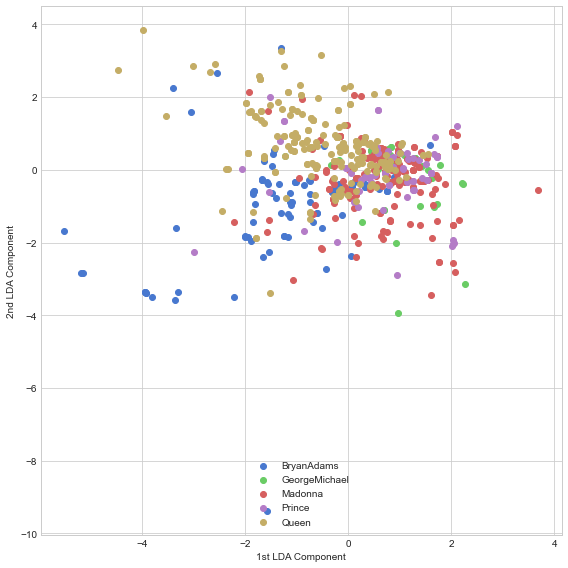

In [6]:
#Creating an instance of the LDA object, which is an object capable of learning and applying LDA from/to data.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#lda will keep a number of components equal to number of classes -1
lda = LinearDiscriminantAnalysis()


#This will learn LDA projection from train data
lda.fit(feat_train,lab_train)

#Now we project the data using LDA
projected_features_train = lda.transform(feat_train)
projected_features_test = lda.transform(feat_test)

#this is only for scatter plot purposes
projected_features = lda.transform(scaler.transform(features))


#Plot the distribution of the data according to the first two principle components
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 8))
    for lab_val, lab_name in zip(range(0,len(classes)),classes):
        plt.scatter(projected_features[labels==lab_val, 0],
                    projected_features[labels==lab_val, 1],
                    label=lab_name)
    plt.xlabel('1st LDA Component')
    plt.ylabel('2nd LDA Component')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [7]:
#Creating an instance of a SVM classifier
model_SVM = sklearn.svm.SVC(kernel='rbf', C=10.0)

#training the model
model_SVM.fit(projected_features_train, lab_train)

#applying the the model on the test data (features)
lab_predict = model_SVM.predict(projected_features_test)


#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

Number of mislabeled samples 63 out of 157
Accuracy: 0.5987261146496815


In [8]:
#computing a comprehensive set of performance metrics
print(sklearn.metrics.classification_report(lab_test, lab_predict))

print(sklearn.metrics.confusion_matrix(lab_test, lab_predict))

              precision    recall  f1-score   support

         0.0       0.57      0.63      0.60        19
         1.0       0.25      0.25      0.25         8
         2.0       0.53      0.64      0.58        45
         3.0       0.68      0.46      0.55        28
         4.0       0.70      0.67      0.68        57

    accuracy                           0.60       157
   macro avg       0.55      0.53      0.53       157
weighted avg       0.61      0.60      0.60       157

[[12  1  2  0  4]
 [ 0  2  4  1  1]
 [ 3  2 29  3  8]
 [ 1  0 11 13  3]
 [ 5  3  9  2 38]]


In [9]:
#displaying names of misclassified files
results = lab_test == lab_predict
for index, value in results.items():
    if value == False:
        print(filenames[index])


Queen_These Are the Days of Our Lives.2.mid
Prince_Cream.mid
Madonna_Vogue.5.mid
Prince_Do Me, Baby.mid
GeorgeMichael_Jesus to a Child.mid
Queen_Headlong.2.mid
BryanAdams_Rock Steady.mid
BryanAdams_I Finally Found Someone.2.mid
Madonna_You'll See.2.mid
Queen_Seven Seas of Rhye.1.mid
Prince_I Would Die 4 U.mid
Queen_These Are the Days of Our Lives.1.mid
BryanAdams_(Everything I Do) I Do It For You.3.mid
GeorgeMichael_Don't Let The Sun Go Down On Me.1.mid
GeorgeMichael_Fastlove.mid
Queen_Keep Yourself Alive.mid
BryanAdams_I Finally Found Someone.1.mid
BryanAdams_(Everything I Do) I Do It For You.4.mid
Prince_Kiss Kiss.5.mid
Madonna_Fever.mid
Madonna_Secret.2.mid
Prince_The Beautiful Ones.mid
Madonna_Don't Cry for Me Argentina.2.mid
Madonna_Oh Father.1.mid
Prince_Let's Go Crazy.4.mid
Prince_Cream.1.mid
Madonna_Take A Bow (1995).9.mid
Queen_Don't Stop Me Now.1.mid
BryanAdams_Run To You.mid
Queen_Love of My Life.mid
Queen_The Miracle.3.mid
Madonna_Justify My Love.mid
Queen_You're My Best Fr